In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [384]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [385]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [387]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Data Pre-Processing

In [388]:
df = df.drop(columns=["Person ID"])

In [389]:
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("None")

In [390]:
df["Sleep Disorder"].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

Target coloumn of only 2 values, since logistic regression is used

In [391]:
sleep_order = {"None": 0, "Insomnia": 1, "Sleep Apnea": 1}
df["Has Sleep Disorder"] = df["Sleep Disorder"].map(sleep_order)
df = df.drop(columns=["Sleep Disorder"])

In [392]:
df["BMI Category"].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

Ordinal Encoding

In [393]:
bmi_order = {"Normal": 0, "Normal Weight": 0, "Overweight": 1, "Obese": 2}
df["BMI Category"] = df["BMI Category"].map(bmi_order)

In [394]:
bp_split = df["Blood Pressure"].str.split("/", expand=True).astype(float)
df["Systolic"] = bp_split[0]
df["Diastolic"] = bp_split[1]
df = df.drop(columns=["Blood Pressure"])

One-Hot Encoding

In [395]:
df = pd.get_dummies(df, columns=["Gender", "Occupation"], drop_first=True)

In [396]:
df.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Has Sleep Disorder,Systolic,...,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,27,6.1,6,42,6,1,77,4200,0,126.0,...,False,False,False,False,False,False,False,False,True,False
1,28,6.2,6,60,8,0,75,10000,0,125.0,...,True,False,False,False,False,False,False,False,False,False
2,28,6.2,6,60,8,0,75,10000,0,125.0,...,True,False,False,False,False,False,False,False,False,False
3,28,5.9,4,30,8,2,85,3000,1,140.0,...,False,False,False,False,False,True,False,False,False,False
4,28,5.9,4,30,8,2,85,3000,1,140.0,...,False,False,False,False,False,True,False,False,False,False


In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              374 non-null    int64  
 1   Sleep Duration                   374 non-null    float64
 2   Quality of Sleep                 374 non-null    int64  
 3   Physical Activity Level          374 non-null    int64  
 4   Stress Level                     374 non-null    int64  
 5   BMI Category                     374 non-null    int64  
 6   Heart Rate                       374 non-null    int64  
 7   Daily Steps                      374 non-null    int64  
 8   Has Sleep Disorder               374 non-null    int64  
 9   Systolic                         374 non-null    float64
 10  Diastolic                        374 non-null    float64
 11  Gender_Male                      374 non-null    bool   
 12  Occupation_Doctor     

In [398]:
X_df = df.drop(['Has Sleep Disorder'], axis=1).values
y_df = df['Has Sleep Disorder'].values.reshape(-1,1)

In [399]:
print(X_df.shape)
print(y_df.shape)

(374, 21)
(374, 1)


Generating train and test datasets

In [400]:
np.random.seed(40)
indices = np.arange(X_df.shape[0])
np.random.shuffle(indices)
X_df = X_df[indices]
y_df = y_df[indices]

In [401]:
split = int(0.8 * X_df.shape[0])

In [402]:
X_train, X_test = X_df[:split], X_df[split:]
y_train, y_test = y_df[:split], y_df[split:]

In [403]:
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

X_train shape: (299, 21) y_train shape: (299, 1)
X_test shape: (75, 21) y_test shape: (75, 1)


In [404]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [405]:
def zscore_normalize_features(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    sigma[sigma == 0] = 1.0
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [406]:
X_train, X_mu, X_sigma = zscore_normalize_features(X_train)

In [407]:
X_test = (X_test - X_mu) / X_sigma

Implementing PCA for Visualization

In [408]:
def pca(X, n_components=1):
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_idx]
    components = eigenvectors[:, :n_components]
    X_reduced = np.dot(X_centered, components)
    return X_reduced, components

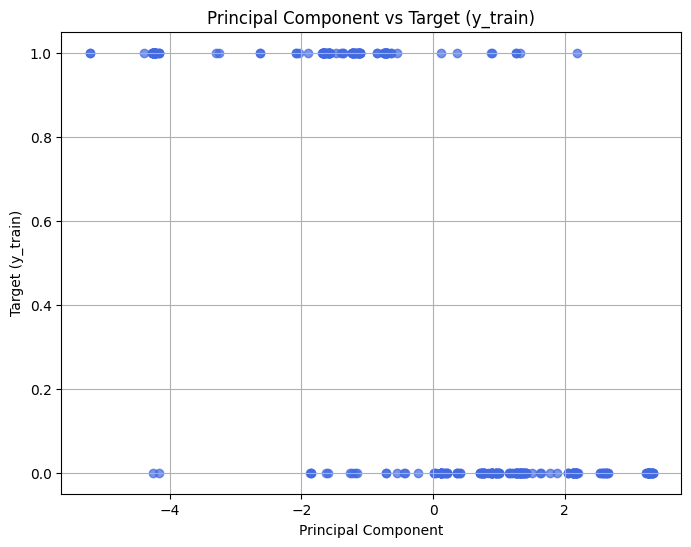

In [409]:
X_pca, _ = pca(X_train, n_components=1)
X_pca = X_pca.flatten()
y_train_flat = y_train.flatten()

plt.figure(figsize=(8,6))
plt.scatter(X_pca, y_train_flat, color='royalblue', alpha=0.7)
plt.title("Principal Component vs Target (y_train)")
plt.xlabel("Principal Component")
plt.ylabel("Target (y_train)")
plt.grid(True)
plt.show()

In [410]:
def sigmoid(z):
    g = 1/(1+np.exp(-z)) 
    return g

In [411]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)
    cost = (-1 / m) * np.sum(y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb))
    return cost

In [412]:
m, n = X_train.shape
initial_w = np.random.randn(n, 1) * 0.01 
initial_b = np.random.randn() * 0.01    
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print(f'Cost at initial w and b (zeros): {cost}')

Cost at initial w and b (zeros): 0.6937944538327234


In [413]:
def compute_cost_reg(X, y, w, b, lambda_):
    m,n = X.shape
    cost_without_reg = compute_cost(X, y, w, b)
    reg_cost = (lambda_ / (2 * m)) * np.sum(w ** 2)
    total_cost = cost_without_reg + reg_cost
    return total_cost

In [414]:
m, n = X_train.shape
initial_w = np.random.randn(n, 1) * 0.01 
initial_b = np.random.randn() * 0.01    
lambda_ = 1
cost = compute_cost_reg(X_train, y_train, initial_w, initial_b, lambda_)
print("Regularized cost :", cost)

Regularized cost : 0.6898913531173582


In [415]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    f_wb = sigmoid(np.dot(X, w) + b)
    err = f_wb - y
    dj_dw = (1/m) * np.dot(X.T, err)
    dj_db = (1/m) * np.sum(err)
    return dj_db, dj_dw

In [416]:
dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw[:4].tolist()}' )

dj_db at initial w and b (zeros):0.09322728517077483
dj_dw at initial w and b (zeros):[[-0.20659208972233623], [0.18188611876742905], [0.16631106275559546], [-0.04187689334231263]]


In [417]:
def compute_gradient_reg(X, y, w, b, lambda_): 
    m, n = X.shape
    dj_db, dj_dw = compute_gradient(X, y, w, b)
    dj_dw += (lambda_ / m) * w
    return dj_db, dj_dw

In [418]:
m, n = X_train.shape
initial_w = np.random.randn(n, 1) * 0.01 
initial_b = np.random.randn() * 0.01    
lambda_ = 1
dj_db, dj_dw = compute_gradient_reg(X_train, y_train, initial_w, initial_b, lambda_)
print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

dj_db: 0.09868757423900049
First few elements of regularized dj_dw:
 [[-0.21160544639303944], [0.18524150730224775], [0.16919604905456953], [-0.046277383486481784]]


In [419]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    m = len(X)
    J_history = []
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
        if i<100000:
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            print(f"Iteration {i:4}: Cost {float(J_history[-1])}   ")
    return w_in, b_in, J_history

In [420]:
def predict(X, w, b): 
    m, n = X.shape
    p = np.zeros(m) 
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)
    p = (f_wb >= 0.5).astype(int)
    return p

In [421]:
m, n = X_train.shape
initial_w = np.random.randn(n, 1) * 0.01 
initial_b = np.random.randn() * 0.01    
iterations = 100
alpha = 0.5
lambda_ = 1
w,b, J_history = gradient_descent(X_train ,y_train, initial_w, initial_b, compute_cost_reg, compute_gradient_reg, alpha, iterations, lambda_)
print(f"b,w found by gradient descent: {b}, {w}")

Iteration    0: Cost 0.4326046837240829   
Iteration   10: Cost 0.2553081786881918   
Iteration   20: Cost 0.24436384246395418   
Iteration   30: Cost 0.2404451528591081   
Iteration   40: Cost 0.2383769554761138   
Iteration   50: Cost 0.23709019272361498   
Iteration   60: Cost 0.23620076707453208   
Iteration   70: Cost 0.23553564055920403   
Iteration   80: Cost 0.23500765699293022   
Iteration   90: Cost 0.23456954266627653   
Iteration   99: Cost 0.23422932275854624   
b,w found by gradient descent: -0.7403518419788923, [[ 0.27272181]
 [-0.14294734]
 [-0.30861782]
 [-0.01021051]
 [ 0.12992685]
 [ 0.74278289]
 [ 0.395552  ]
 [-0.04998063]
 [ 0.67800379]
 [ 0.73185124]
 [-0.11487584]
 [-0.23864844]
 [-0.13676528]
 [-0.42480002]
 [-0.22047877]
 [-0.14337637]
 [ 0.08720307]
 [ 0.37397556]
 [-0.2402218 ]
 [-0.24504965]
 [ 0.25910269]]


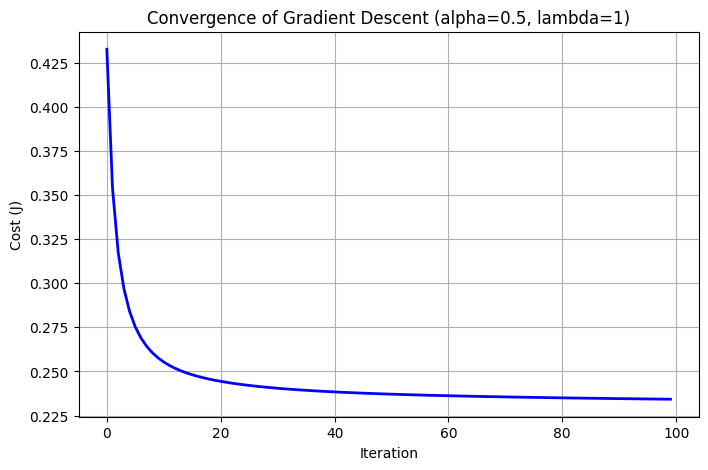

In [422]:
plt.figure(figsize=(8,5))
plt.plot(range(len(J_history)), J_history, color='b', linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Cost (J)")
plt.title(f"Convergence of Gradient Descent (alpha={alpha}, lambda={lambda_})")
plt.grid(True)
plt.show()

In [423]:
def f1_score_manual(y_true, y_pred):
    classes = np.unique(y_true)
    f1s = []
    for cls in classes:
        tp = np.sum((y_true == cls) & (y_pred == cls))
        fp = np.sum((y_true != cls) & (y_pred == cls))
        fn = np.sum((y_true == cls) & (y_pred != cls))
        precision = tp / (tp + fp + 1e-10)
        recall = tp / (tp + fn + 1e-10)
        f1 = 2 * precision * recall / (precision + recall + 1e-10)
        f1s.append(f1)
    return np.mean(f1s)

In [424]:
y_pred_train = predict(X_train, w, b)
y_pred_test = predict(X_test, w, b)

In [425]:
f1 = f1_score_manual(y_train, y_pred_train)
print("F1-Score Train:", f1)
f1 = f1_score_manual(y_test, y_pred_test)
print("F1-Score Test:", f1)

F1-Score Train: 0.9343123084421632
F1-Score Test: 0.9321266967801363


In [426]:
print('Train Accuracy: %f'%(np.mean(y_pred_train == y_train) * 100))
print('Test Accuracy: %f'%(np.mean(y_pred_test == y_test) * 100))

Train Accuracy: 93.645485
Test Accuracy: 93.333333
